# Model validation

   
Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.
Feature Importance.

Model Iteration (Wednesday and Thursday)
Rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes).


In [172]:
import seaborn as sns
import pandas as pd 
import numpy as np 
url = 'https://raw.githubusercontent.com/repicao/IH_AB_DA_FT_OCT_2023/main/Class_Materials/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv'
df = pd.read_csv(url)
df = df.dropna()
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


## x-y split

In [235]:
X = df[['customer_lifetime_value','income','months_since_last_claim',
        'months_since_policy_inception','number_of_policies',
             'number_of_open_complaints']] #all the rest of the numerical columns
y = df[['total_claim_amount']]
X

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_policies,number_of_open_complaints
0,4809,48029,7,52,9,0
1,2228,92260,3,26,1,0
2,14947,22139,34,31,2,0
3,22332,49078,10,3,2,0
4,9025,23675,33,31,7,0
...,...,...,...,...,...,...
10684,15563,61541,12,40,7,0
10685,5259,61146,7,68,6,0
10686,23893,39837,11,63,2,0
10687,11971,64195,0,27,6,4


## adding the hot encoded categorical variables

In [196]:
df_numerical = df.select_dtypes(include='number')


df_categorical = df[['coverage','response','sales_channel',
                     'vehicle_class','vehicle_size','policy_type','gender']]

df_date = df[['effective_to_date']]


In [197]:
df_categorical

,coverage,response,sales_channel,vehicle_class,vehicle_size,policy_type,gender
0,basic,no,agent,four-door car,medsize,corporate auto,m
1,basic,no,call center,four-door car,medsize,personal auto,f
2,basic,no,call center,suv,medsize,personal auto,m
3,extended,yes,branch,four-door car,medsize,corporate auto,m
4,premium,no,branch,four-door car,medsize,personal auto,f
...,...,...,...,...,...,...,...
10684,premium,no,web,luxury car,medsize,personal auto,f
10685,basic,no,branch,four-door car,medsize,personal auto,f
10686,extended,no,web,luxury suv,medsize,corporate auto,f
10687,premium,no,branch,suv,medsize,personal auto,f


In [233]:
#one hot encoding
categorical = pd.get_dummies(df_categorical)
categorical

,coverage_basic,coverage_extended,coverage_premium,response_no,response_yes,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto,gender_f,gender_m
0,1,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,1,0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
3,0,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
4,0,0,1,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
10685,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
10686,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
10687,0,0,1,1,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [253]:
#we glue the categorical with the numerical in X 
new_X = pd.concat([X, categorical],axis=1)
new_X.reset_index(drop=True,inplace=True)
new_X

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_policies,number_of_open_complaints,coverage_basic,coverage_extended,coverage_premium,response_no,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto,gender_f,gender_m
0,4809,48029,7,52,9,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,2228,92260,3,26,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
2,14947,22139,34,31,2,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
3,22332,49078,10,3,2,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
4,9025,23675,33,31,7,0,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,12,40,7,0,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
10685,5259,61146,7,68,6,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
10686,23893,39837,11,63,2,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
10687,11971,64195,0,27,6,4,0,0,1,1,...,1,0,0,1,0,0,1,0,1,0


## Train-test split

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X,y,test_size = 0.25, random_state = 100)

In [257]:
y_train

,total_claim_amount
5869,886
5467,37
1322,326
9921,155
9140,699
...,...
350,246
79,89
8039,314
6936,64


In [256]:
X_train

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_policies,number_of_open_complaints,coverage_basic,coverage_extended,coverage_premium,response_no,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto,gender_f,gender_m
5869,9486,25322,23,52,3,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
5467,7762,23827,18,77,3,2,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
1322,7806,23706,1,56,2,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
9921,8810,76266,24,88,3,1,0,0,1,1,...,0,1,0,1,0,0,1,0,1,0
9140,7996,70061,2,57,3,0,0,1,0,1,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,2476,47918,2,51,1,0,1,0,0,1,...,0,1,0,1,0,1,0,0,1,0
79,9312,75986,11,44,3,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
8039,6945,15850,28,14,2,0,1,0,0,1,...,0,1,0,1,0,1,0,0,1,0
6936,8718,89096,1,50,3,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1


## Standardize the data (after the data split!).

In [258]:
from sklearn.preprocessing import StandardScaler

In [259]:
scaler = StandardScaler()

#fit and scale


X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled



#scaler.fit(X_train)
#scaler.trasnsform(X_test)

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_policies,number_of_open_complaints,coverage_basic,coverage_extended,coverage_premium,response_no,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto,gender_f,gender_m
0,0.208233,-1.080264,0.775438,0.133066,0.006997,-0.425585,-1.262939,1.533353,-0.308596,0.389093,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,1.916071,-1.713806,-0.203912,-1.017874,1.017874
1,-0.039727,-1.140466,0.281327,1.029148,0.006997,1.753584,-1.262939,-0.652166,3.240481,0.389093,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,0.982440,-0.982440
2,-0.033399,-1.145338,-1.398648,0.276439,-0.408472,0.664000,0.791804,-0.652166,-0.308596,-2.570080,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,1.916071,-1.713806,-0.203912,-1.017874,1.017874
3,0.111005,0.971172,0.874260,1.423424,0.006997,0.664000,-1.262939,-0.652166,3.240481,0.389093,...,-0.500741,1.991618,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,0.982440,-0.982440
4,-0.006071,0.721306,-1.299826,0.312283,0.006997,-0.425585,-1.262939,1.533353,-0.308596,0.389093,...,-0.500741,-0.502104,-0.342818,-1.549960,2.073182,1.916071,-1.713806,-0.203912,0.982440,-0.982440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,-0.800005,-0.170358,-1.299826,0.097223,-0.823941,-0.425585,0.791804,-0.652166,-0.308596,0.389093,...,-0.500741,1.991618,-0.342818,0.645178,-0.482350,1.916071,-1.713806,-0.203912,0.982440,-0.982440
8012,0.183207,0.959897,-0.410427,-0.153680,0.006997,-0.425585,-1.262939,-0.652166,3.240481,0.389093,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,-1.017874,1.017874
8013,-0.157235,-1.461687,1.269548,-1.228978,-0.408472,-0.425585,0.791804,-0.652166,-0.308596,0.389093,...,-0.500741,1.991618,-0.342818,0.645178,-0.482350,1.916071,-1.713806,-0.203912,0.982440,-0.982440
8014,0.097773,1.487817,-1.398648,0.061380,0.006997,-0.425585,0.791804,-0.652166,-0.308596,0.389093,...,1.997042,-0.502104,2.917001,-1.549960,-0.482350,-0.521901,0.583497,-0.203912,-1.017874,1.017874


In [260]:
#we only scale the X_test, we dont fit them! 

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)
X_test_scaled


,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_policies,number_of_open_complaints,coverage_basic,coverage_extended,coverage_premium,response_no,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto,gender_f,gender_m
0,-0.769226,0.318581,0.874260,-1.300665,-0.823941,-0.425585,0.791804,-0.652166,-0.308596,0.389093,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,0.982440,-0.982440
1,0.372485,1.559414,0.281327,-0.727172,0.006997,3.932754,-1.262939,1.533353,-0.308596,0.389093,...,1.997042,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,-1.017874,1.017874
2,0.175584,1.608380,-0.410427,1.351738,0.006997,-0.425585,-1.262939,1.533353,-0.308596,0.389093,...,1.997042,-0.502104,-0.342818,-1.549960,2.073182,-0.521901,-1.713806,4.904080,-1.017874,1.017874
3,0.194138,-0.746962,0.775438,-0.619642,-0.408472,-0.425585,-1.262939,1.533353,-0.308596,0.389093,...,-0.500741,-0.502104,-0.342818,-1.549960,2.073182,-0.521901,0.583497,-0.203912,0.982440,-0.982440
4,0.290216,-1.451741,-0.805715,-1.515724,1.668873,-0.425585,-1.262939,1.533353,-0.308596,0.389093,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,-1.017874,1.017874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,-0.021173,-0.955432,-0.509249,0.527342,-0.408472,-0.425585,0.791804,-0.652166,-0.308596,0.389093,...,-0.500741,-0.502104,2.917001,-1.549960,-0.482350,1.916071,-1.713806,-0.203912,-1.017874,1.017874
2669,-0.533347,0.335293,-0.608071,-1.085605,-0.823941,-0.425585,-1.262939,-0.652166,3.240481,-2.570080,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,-1.017874,1.017874
2670,-0.626979,0.348541,0.083683,0.061380,-0.823941,-0.425585,-1.262939,1.533353,-0.308596,0.389093,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,-1.017874,1.017874
2671,-0.296174,0.223266,0.083683,0.276439,0.006997,-0.425585,-1.262939,1.533353,-0.308596,-2.570080,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,0.982440,-0.982440


#fit the y_train
y_fitted = scaler.fit(y_train)

#scale 
y_train_scaled = scaler.fit_transform(y_train)

y_train_scaled = pd.DataFrame(y_train_scaled,columns = y_train.columns)
y_train_scaled

## create new model

In [261]:
from sklearn.linear_model import LinearRegression

In [262]:
lm = LinearRegression()

In [263]:
model = lm.fit(X_train_scaled, y_train)

In [266]:
model.coef_

array([[ 5.86195485e+00, -3.30199656e+01,  3.42376132e+00,
        -7.31318154e-01,  1.19666103e+00, -1.83920406e+00,
        -8.88629880e+14, -8.35456651e+14, -5.14473417e+14,
        -5.15798291e+14, -5.15798291e+14, -2.25381641e+14,
        -2.09258607e+14, -1.83844771e+14, -1.65984432e+14,
         2.75528300e+14,  7.51673269e+13,  7.63693387e+13,
         1.22663015e+14,  2.20642228e+14,  2.21001469e+14,
         1.52255316e+15,  2.26101852e+15,  1.94215820e+15,
         6.68012998e+14,  7.08917138e+14,  3.18833183e+14,
        -2.27670314e+14, -2.27670314e+14]])

In [267]:
model.intercept_

array([434.8472347])

## Predict

## create the y_pred

In [268]:
y_pred = model.predict(X_test_scaled)

In [269]:
y_test.shape

(2673, 1)

In [270]:
np.array(y_test)

array([[320],
       [459],
       [ 22],
       ...,
       [213],
       [547],
       [307]])

## real_vs_pred

In [271]:
real_vs_pred = pd.DataFrame({'y_test': y_test["total_claim_amount"], 'y_pred':y_pred[:,0]})

In [272]:
real_vs_pred

,y_test,y_pred
9700,320,260.503485
4662,459,567.597235
1401,22,643.159735
6313,111,462.628485
8906,1000,661.847235
...,...,...
8832,453,351.159735
2498,513,558.847235
10126,213,399.597235
9257,547,369.128485


## Compute the MSE

In [273]:
from sklearn.metrics import mean_squared_error as mse

In [274]:
mse(real_vs_pred['y_test'], real_vs_pred['y_pred'])

50735.99060019191

## RMSE

In [275]:
import numpy as np 
np.sqrt(mse(real_vs_pred['y_test'], real_vs_pred['y_pred']))

225.24651073921635

In [276]:
y_test

,total_claim_amount
9700,320
4662,459
1401,22
6313,111
8906,1000
...,...
8832,453
2498,513
10126,213
9257,547


## Linear Regression using statsmodels

In [277]:
import statsmodels.api as sm 

In [278]:
X_train_const = sm.add_constant(X_train.to_numpy())

model_1 = sm.OLS(y_train, X_train_const).fit()
predictions_train = model_1.predict(X_train_const)

X_test_const = sm.add_constant(X_test)
y_pred = model_1.predict(X_test_const)
print_model = model_1.summary()
print_model #this is for the X_train

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:22:55   Log-Likelihood:                -55030.
No. Observations:                8016   AIC:                         1.101e+05
Df Residuals:                    7993   BIC:                         1.103e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        233.5463      3.717     62.839      0.000     226.261     240.832
x1             0.0008      0.000      2.082      0.037     4.9e-05       0.002
x2            -0.0013      0.000    -12.607      0.000      -0.002      -0.001
x3             0.3859      0.257      1.501      0.133      -0.118       0.890
x4            -0.0263      0.093     -0.282      0.778      -0.209       0.156
x5             0.5751      1.079      0.533      0.594      -1.541       2.691
x6            -2.2041      2.832     -0.778      0.436      -7.756       3.348
x7           -44.6484      3.945    -11.317      0.000     -52.382     -36.914
x8            58.5289      4.521     12.947      0.000      49.668      67.390
x9           219.6657      6.620     33.184      0.000     206.689     232.642
x10          113.2237      4.014     28.206      0.000     105.355     121.092
x11          120.3226      4.568     26.342      0.000     111.369     129.276
x12           58.4372      4.113     14.207      0.000      50.374      66.500
x13           52.0571      4.492     11.588      0.000      43.251      60.863
x14           60.7841      5.145     11.814      0.000      50.698      70.870
x15           62.2680      5.621     11.078      0.000      51.249      73.287
x16         -258.1841      5.890    -43.837      0.000    -269.729    -246.639
x17          467.5177     16.480     28.369      0.000     435.213     499.823
x18          394.0150     16.256     24.238      0.000     362.148     425.882
x19          -56.5745     10.545     -5.365      0.000     -77.246     -35.903
x20          -53.6275      6.789     -7.899      0.000     -66.936     -40.319
x21         -259.6003      6.964    -37.279      0.000    -273.251    -245.950
x22           65.3194      6.049     10.798      0.000      53.461      77.177
x23           52.2812      3.900     13.406      0.000      44.636      59.926
x24          115.9457      5.079     22.829      0.000     105.990     125.902
x25           70.7466      5.732     12.342      0.000      59.510      81.983
x26           76.5682      4.888     15.666      0.000      66.987      86.149
x27           86.2315      9.363      9.209      0.000      67.877     104.586
x28           95.9032      3.186     30.100      0.000      89.657     102.149
x29          137.6431      3.207     42.916      0.000     131.356     143.930
==============================================================================
Omnibus:                     1258.742   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7061.435
Skew:                           0.635   Prob(JB):                         0.00
Kurtosis:                       7.419   Cond. No.                     4.85e+18
==============================================================================

N

## Plots

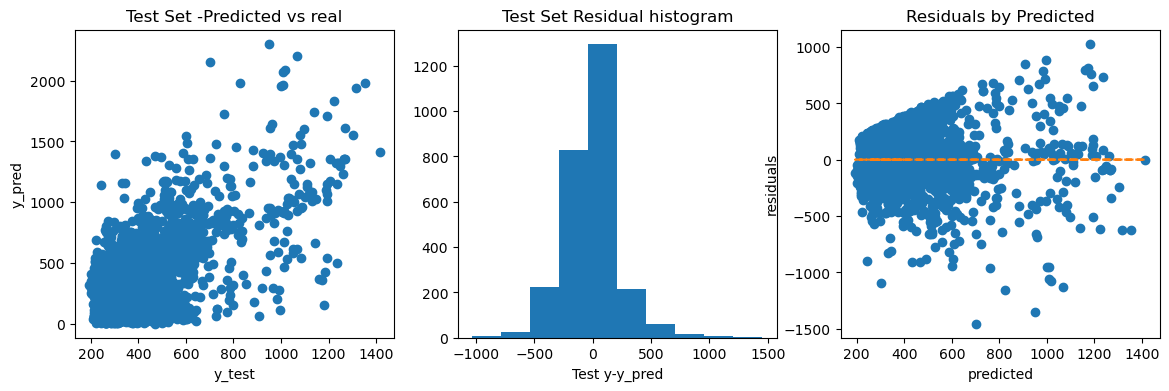

In [279]:
## Plot y_pred vs y_test
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test['total_claim_amount'], 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.
# Does it ressemble a normal distribution?
ax[1].hist(y_test['total_claim_amount'] - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

# Homoscedasticity
ax[2].plot(y_pred,np.array(y_pred)-np.array(y_test['total_claim_amount']),"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

## MAE 

In [280]:
from sklearn.metrics import mean_absolute_error as mae 

In [281]:
error = mae(y_test, y_pred) 
error

155.32824924158072

## R2

In [282]:
#we calculate not the X_test and we can compaire it with X_train
from sklearn.metrics import r2_score 

In [285]:
R_square = r2_score(y_test, y_pred)
R_square

0.3920632628682371

## Plot feature importances

In [286]:
coefficients = model.coef_

coefficients.shape

(1, 29)

In [287]:
np.array(coefficients)

array([[ 5.86195485e+00, -3.30199656e+01,  3.42376132e+00,
        -7.31318154e-01,  1.19666103e+00, -1.83920406e+00,
        -8.88629880e+14, -8.35456651e+14, -5.14473417e+14,
        -5.15798291e+14, -5.15798291e+14, -2.25381641e+14,
        -2.09258607e+14, -1.83844771e+14, -1.65984432e+14,
         2.75528300e+14,  7.51673269e+13,  7.63693387e+13,
         1.22663015e+14,  2.20642228e+14,  2.21001469e+14,
         1.52255316e+15,  2.26101852e+15,  1.94215820e+15,
         6.68012998e+14,  7.08917138e+14,  3.18833183e+14,
        -2.27670314e+14, -2.27670314e+14]])

In [288]:
feature_importances = pd.DataFrame({'variable':X.columns, 'coefficient':coefficients [:,0]})  

ValueError: All arrays must be of the same length

In [289]:
sns.barplot(x=feature_importances['variable'], y=feature_importances['coefficient'])


NameError: name 'feature_importances' is not defined